In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn import model_selection, preprocessing
import matplotlib.pyplot as plt
import seaborn as sn
import missingno as msno
%matplotlib inline

In [8]:
prop2016 = pd.read_csv('properties_2016.csv', low_memory=False)
prop2017 = pd.read_csv('properties_2017.csv', low_memory=False)
all_properties = prop2016.append(prop2017)
print("{} rows with {} features".format(*all_properties.shape))

5970434 rows with 58 features


In [12]:
train = pd.read_csv('train.csv', low_memory=False, parse_dates=['transactiondate'])
test = pd.read_csv('test.csv', low_memory=False, parse_dates=['transactiondate'])
properties = train.append(test)
print("{} rows with {} features".format(*properties.shape))

167888 rows with 60 features


In [13]:
dtype_df = properties.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()


,Column Type,Count
0,int64,1
1,float64,53
2,datetime64[ns],1
3,object,5


In [21]:
display(properties.head(n = 5).transpose())

,0,1,2,3,4
parcelid,11016594,14366692,12098116,12643413,14432541
logerror,0.0276,-0.1684,-0.004,0.0218,-0.005
transactiondate,2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-02 00:00:00,2016-01-02 00:00:00
airconditioningtypeid,1,NaN,1,1,NaN
architecturalstyletypeid,NaN,NaN,NaN,NaN,NaN
basementsqft,NaN,NaN,NaN,NaN,NaN
bathroomcnt,2,3.5,3,2,2.5
bedroomcnt,3,4,2,2,4
buildingclasstypeid,NaN,NaN,NaN,NaN,NaN
buildingqualitytypeid,4,NaN,4,4,NaN


In [11]:
###
### Count of unique values for the object types
###
objects = train.select_dtypes(include=[object])
print(objects.nunique(dropna=False))


transactiondate               612
hashottuborspa                  2
propertycountylandusecode      87
propertyzoningdesc           2211
fireplaceflag                   2
taxdelinquencyflag              2
dtype: int64


In [14]:
###
### ID fields
###

id_fields = train[['heatingorsystemtypeid', 'propertylandusetypeid', 'storytypeid', 'airconditioningtypeid', 'architecturalstyletypeid', 'typeconstructiontypeid', 'buildingclasstypeid']]
print(id_fields.nunique(dropna=False))

heatingorsystemtypeid       13
propertylandusetypeid       15
storytypeid                  2
airconditioningtypeid        7
architecturalstyletypeid     7
typeconstructiontypeid       5
buildingclasstypeid          3
dtype: int64


In [31]:
print("heatingorsystemtypeid:")
print(properties.heatingorsystemtypeid.value_counts())
print("propertylandusetypeid:")
print(properties.propertylandusetypeid.value_counts())
print("storytypeid:")
print(properties.storytypeid.value_counts())
print("airconditioningtypeid:")
print(properties.airconditioningtypeid.value_counts())
print("architecturalstyletypeid:")
print(properties.architecturalstyletypeid.value_counts())
print("typeconstructiontypeid:")
print(properties.typeconstructiontypeid.value_counts())
print("buildingclasstypeid:")
print(properties.buildingclasstypeid.value_counts())


heatingorsystemtypeid:
2.0     71936
7.0     29626
24.0     1921
6.0      1747
20.0      201
13.0      136
18.0       48
1.0        26
10.0        5
11.0        2
14.0        2
12.0        1
Name: heatingorsystemtypeid, dtype: int64
propertylandusetypeid:
261.0    113078
266.0     42157
246.0      4397
269.0      4281
248.0      1608
247.0      1168
265.0       691
263.0       158
275.0       105
260.0       104
267.0        57
31.0         32
264.0        17
47.0          1
Name: propertylandusetypeid, dtype: int64
storytypeid:
7.0    93
Name: storytypeid, dtype: int64
airconditioningtypeid:
1.0     49854
13.0     3408
5.0       382
11.0      116
9.0        27
3.0         1
Name: airconditioningtypeid, dtype: int64
architecturalstyletypeid:
7.0     394
8.0      35
2.0      16
21.0     15
3.0       7
10.0      1
Name: architecturalstyletypeid, dtype: int64
typeconstructiontypeid:
6.0     516
4.0       3
13.0      2
10.0      1
Name: typeconstructiontypeid, dtype: int64
buildingclasstyp

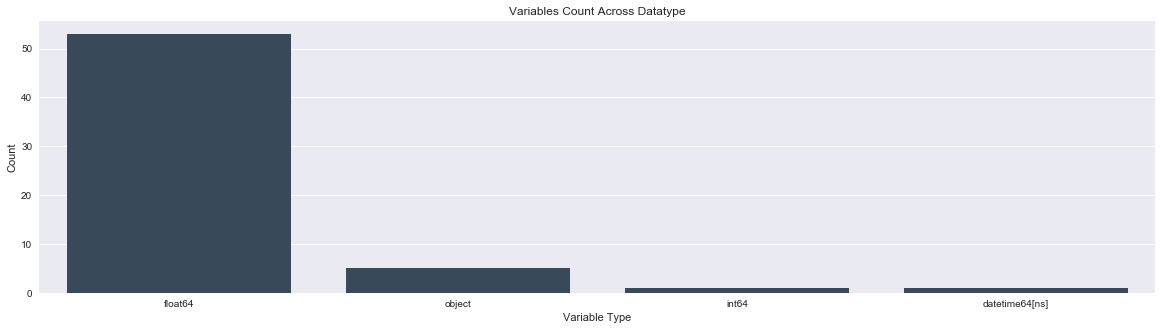

In [15]:
#Display distribution of data types
dataTypeDf = pd.DataFrame(properties.dtypes.value_counts()).reset_index().rename(columns={"index":"variableType",0:"count"})
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
sn.barplot(data=dataTypeDf,x="variableType",y="count",ax=ax,color="#34495e")
ax.set(xlabel='Variable Type', ylabel='Count',title="Variables Count Across Datatype")

In [16]:
#Basic statistics of data fields of type float64 and int64
description_columns = ['basementsqft', 'bedroomcnt', 'calculatedbathnbr', 'bedroomcnt', 'calculatedbathnbr',  'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50', 'finishedsquarefeet6', 'fireplacecnt', 'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'lotsizesquarefeet', 'poolcnt', 'poolsizesum', 'rawcensustractandblock', 'roomcnt', 'threequarterbathnbr', 'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'yearbuilt', 'numberofstories', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount', 'censustractandblock']
display(properties[description_columns].describe().transpose())

,count,mean,std,min,25%,50%,75%,max
basementsqft,93.0,6.953763e+02,5.839521e+02,3.800000e+01,2.800000e+02,5.880000e+02,8.190000e+02,3.560000e+03
bedroomcnt,167854.0,3.041739e+00,1.149134e+00,0.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.600000e+01
calculatedbathnbr,166056.0,2.312542e+00,9.778076e-01,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+01
bedroomcnt,167854.0,3.041739e+00,1.149134e+00,0.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.600000e+01
calculatedbathnbr,166056.0,2.312542e+00,9.778076e-01,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+01
finishedfloor1squarefeet,12893.0,1.356492e+03,6.610686e+02,4.400000e+01,9.450000e+02,1.252000e+03,1.615000e+03,7.625000e+03
calculatedfinishedsquarefeet,166992.0,1.778630e+03,9.403560e+02,2.000000e+00,1.183000e+03,1.541000e+03,2.103000e+03,3.564000e+04
finishedsquarefeet12,159519.0,1.752327e+03,9.213609e+02,2.000000e+00,1.172000e+03,1.520000e+03,2.065000e+03,2.192900e+04
finishedsquarefeet13,75.0,1.395707e+03,1.165391e+02,1.056000e+03,1.344000e+03,1.440000e+03,1.440000e+03,1.584000e+03
finishedsquarefeet15,6591.0,2.368333e+03,1.124302e+03,5.600000e+02,1.634000e+03,2.099000e+03,2.845000e+03,3.564000e+04


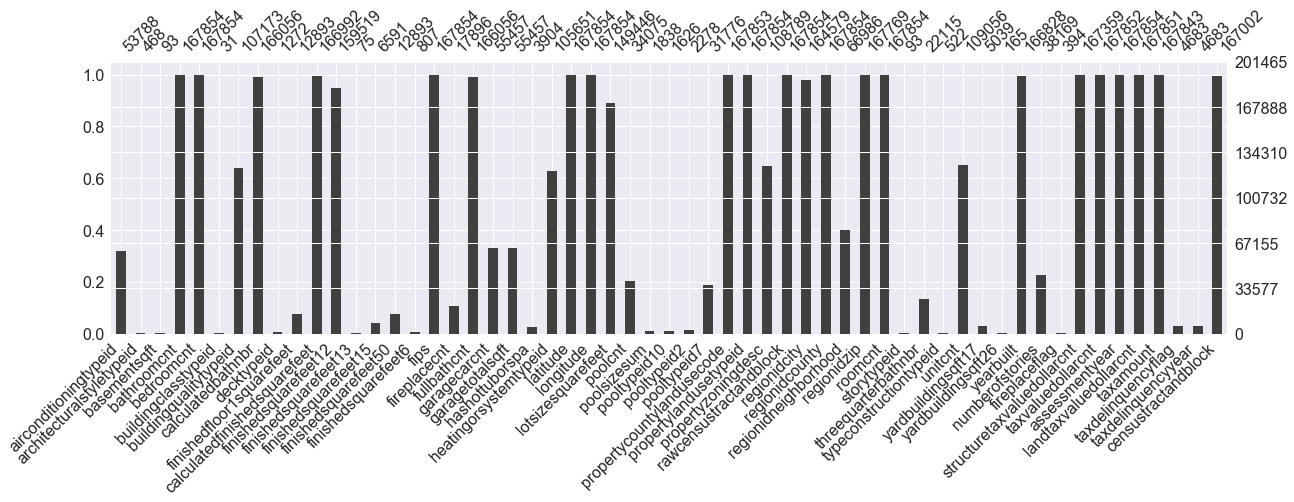

In [17]:
missingValueColumns = properties.columns[properties.isnull().any()].tolist()
msno.bar(properties[missingValueColumns],figsize=(20,5),labels=True,)

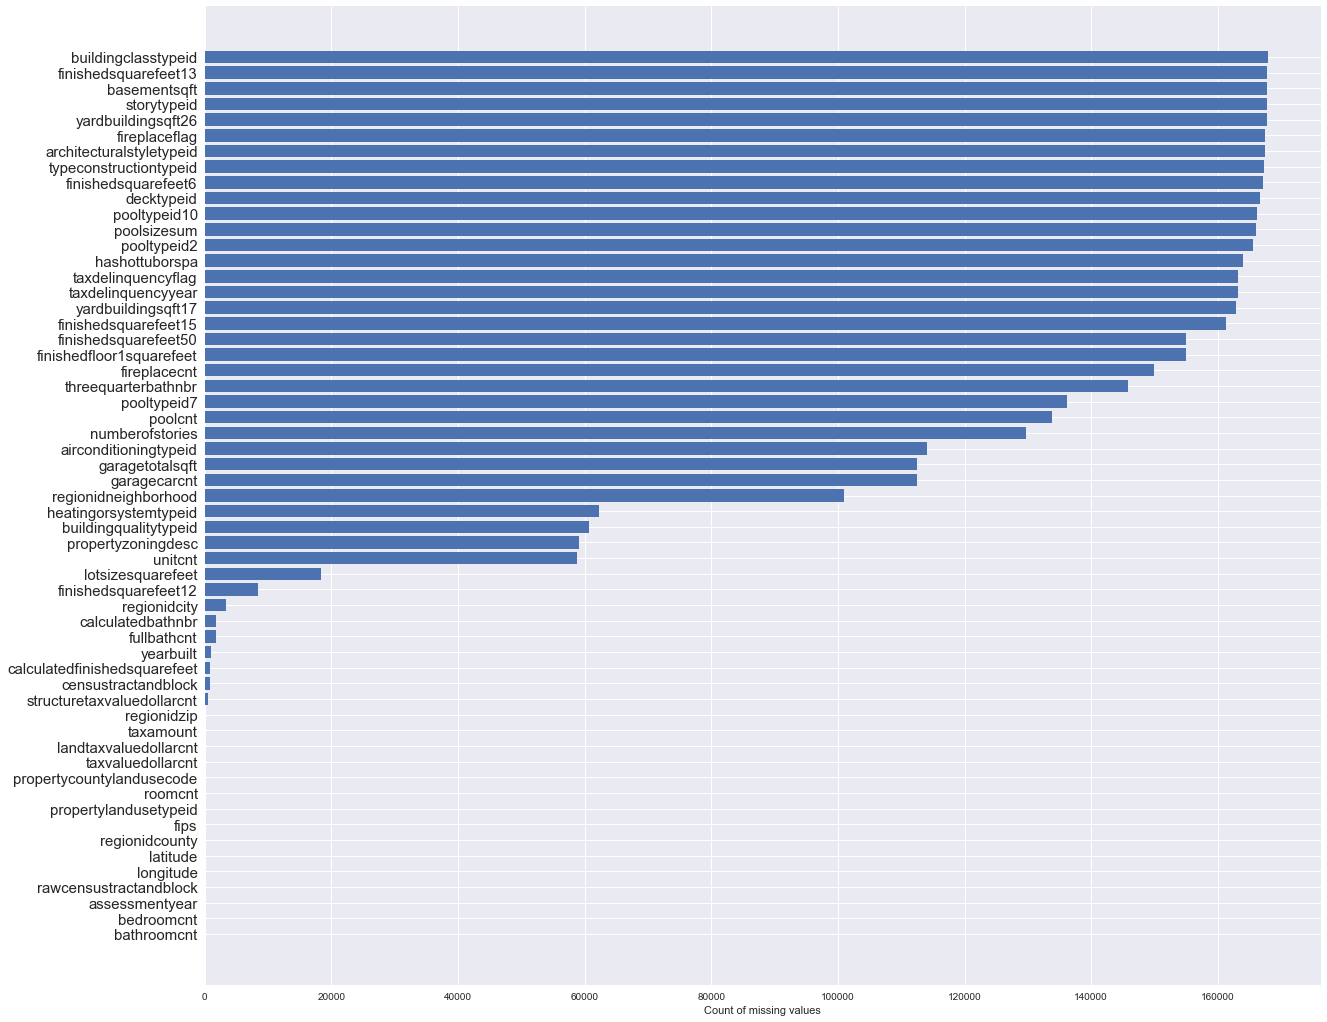

In [19]:
#Missing data
missing_df = properties.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
fig, ax = plt.subplots(figsize=(20,18))
rects = ax.barh(ind, missing_df.missing_count.values)
ax.set_yticks(ind)
plt.yticks(fontsize=15)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
plt.show()

In [20]:
missing_df = properties.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / properties.shape[0]
high_miss_rate = missing_df['missing_ratio']>0.95
missing_df[high_miss_rate]

,column_name,missing_count,missing_ratio
4,architecturalstyletypeid,167420,0.997212
5,basementsqft,167795,0.999446
8,buildingclasstypeid,167857,0.999815
11,decktypeid,166616,0.992424
15,finishedsquarefeet13,167813,0.999553
16,finishedsquarefeet15,161297,0.960742
18,finishedsquarefeet6,167081,0.995193
24,hashottuborspa,163984,0.976746
30,poolsizesum,166050,0.989052
31,pooltypeid10,166262,0.990315


In [3]:
#Training data
train = pd.read_csv('train.csv')
print("{} rows with {} features".format(*train.shape))

#display(train.head(3).transpose())



124247 rows with 4 features


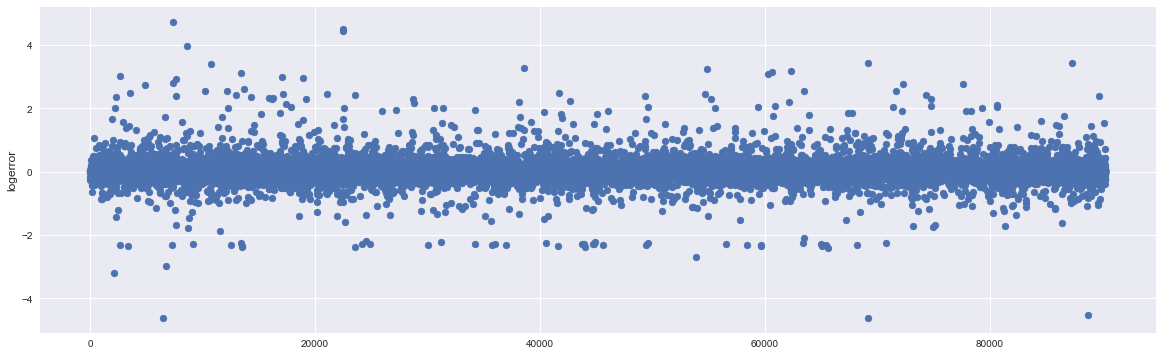

In [21]:
#Log error distribution
plt.figure(figsize=(20,6))
plt.scatter(range(train.shape[0]), train.logerror.values)
plt.ylabel('logerror', fontsize=12)
plt.show()

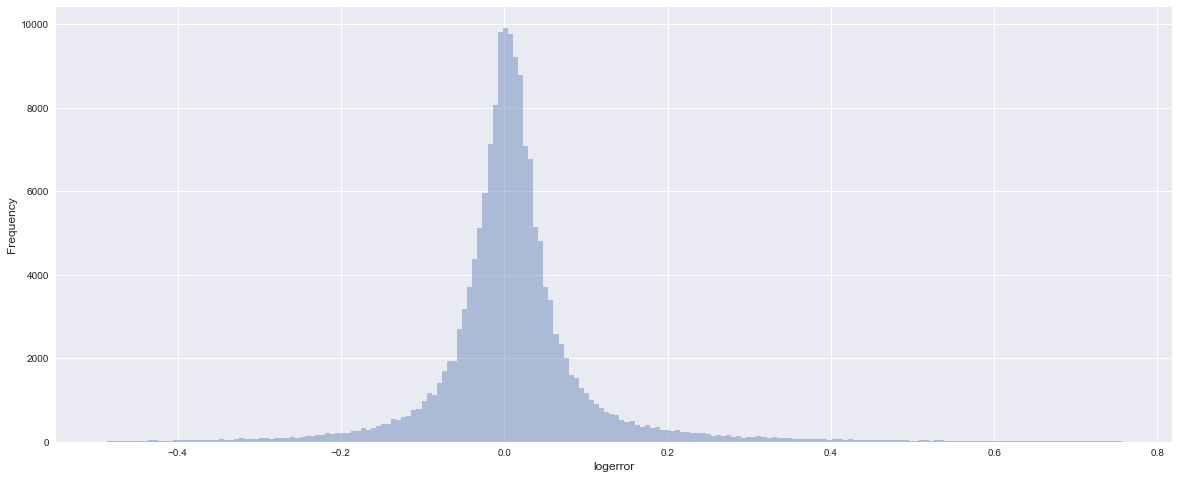

In [29]:
ulimit = np.percentile(properties.logerror.values, 99.5)
llimit = np.percentile(properties.logerror.values, .5)
properties_no_outliers = properties[(properties.logerror > llimit) & (properties.logerror < ulimit)]


plt.figure(figsize=(20,8))
sn.distplot(properties_no_outliers.logerror.values, bins=200, kde=False)
plt.xlabel('logerror', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

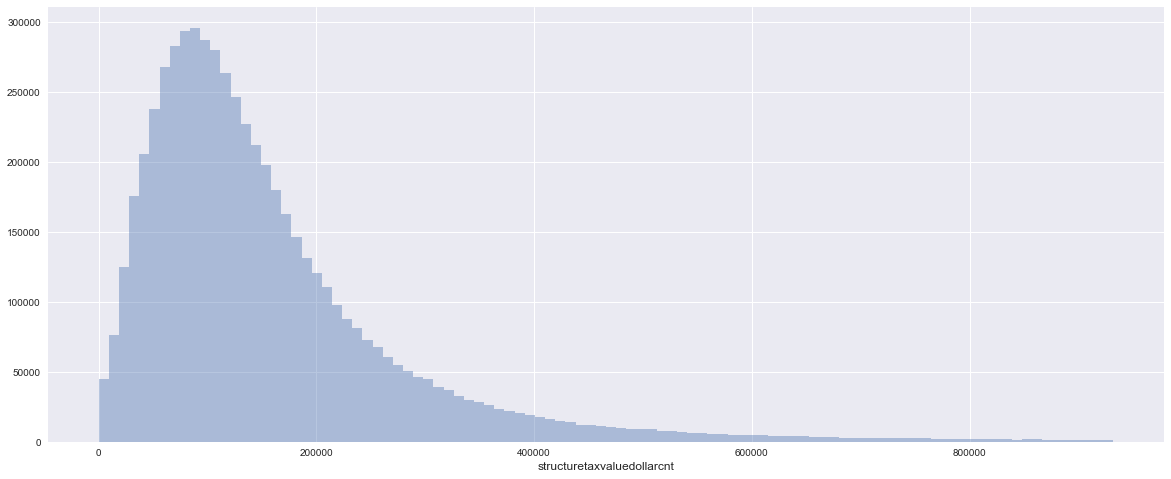

In [7]:
#structuretaxvaluedollarcnt distribution
properties.loc[properties.structuretaxvaluedollarcnt.isnull(),'structuretaxvaluedollarcnt'] = 0

ulimit = np.percentile(properties.structuretaxvaluedollarcnt.values, 99)
llimit = np.percentile(properties.structuretaxvaluedollarcnt.values, 1)
properties_no_outliers = properties[(properties.structuretaxvaluedollarcnt > llimit) & (properties.structuretaxvaluedollarcnt < ulimit)]

plt.figure(figsize=(20,8))
sn.distplot(properties_no_outliers.structuretaxvaluedollarcnt.values, bins=100, kde=False)
plt.xlabel('structuretaxvaluedollarcnt', fontsize=12)
plt.show()

In [ ]:
#log error distribution
ulimit = np.percentile(train.logerror.values, 99)
llimit = np.percentile(train.logerror.values, 1)
train_no_outliers = train[(train.logerror > llimit) & (train.logerror < ulimit)]

plt.figure(figsize=(20,8))
sns.distplot(train.logerror.values, bins=100, kde=False)
plt.xlabel('logerror', fontsize=12)
plt.show()

In [38]:
#Number of times each parcelid occurs in the transactions data. Most houses are only sold once in the time period
(train['parcelid'].value_counts().reset_index())['parcelid'].value_counts()

1    90026
2      123
3        1
Name: parcelid, dtype: int64

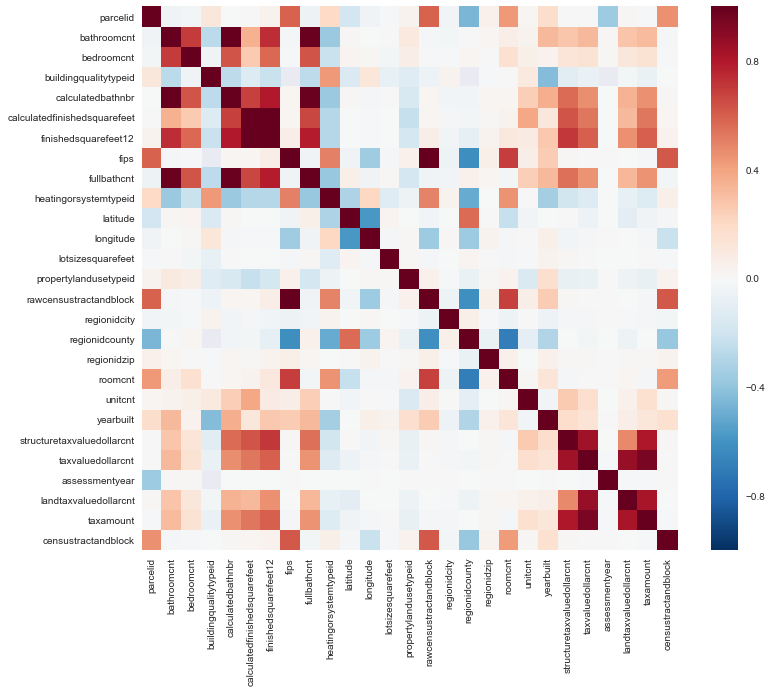

In [40]:
missing_df = properties.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / properties.shape[0]
low_miss_rate = missing_df['missing_ratio']<0.50
good_features = missing_df[low_miss_rate].column_name
plt.figure(figsize=(12,10))
sns.heatmap(properties[good_features].corr(), annot=False)

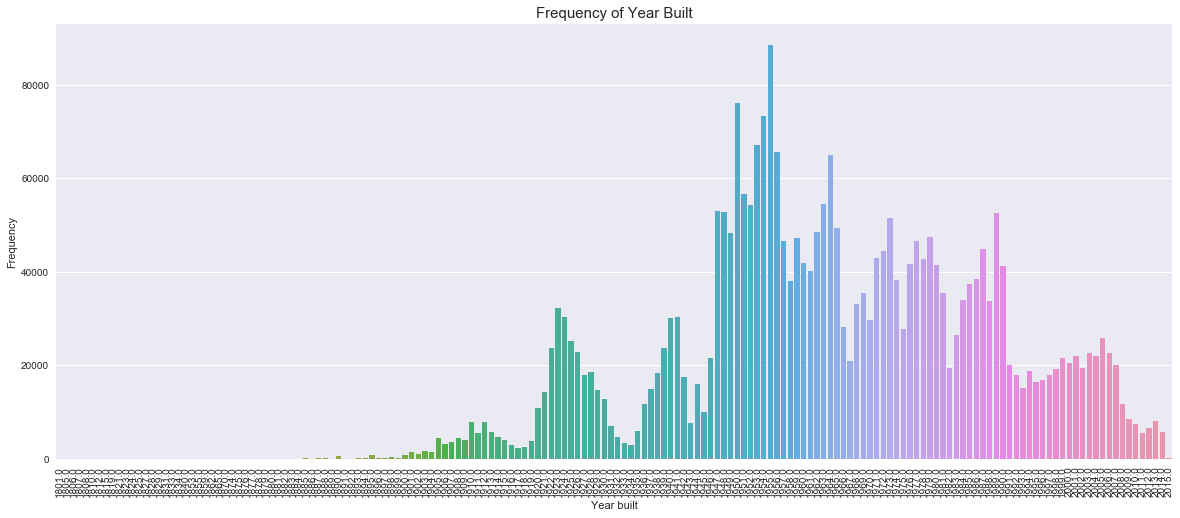

In [42]:

YearBuilt = properties['yearbuilt'].notnull() 
years = properties[YearBuilt].yearbuilt

plt.figure(figsize=(20,8))
sns.countplot(x=years)
plt.ylabel('Frequency')
plt.xlabel('Year built')
plt.xticks(rotation='vertical')
plt.title("Frequency of Year Built", fontsize=15)
plt.show()

/Users/BurrusRA/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/BurrusRA/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/BurrusRA/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/BurrusRA/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:9: DeprecationWarning: 
.ix is depr

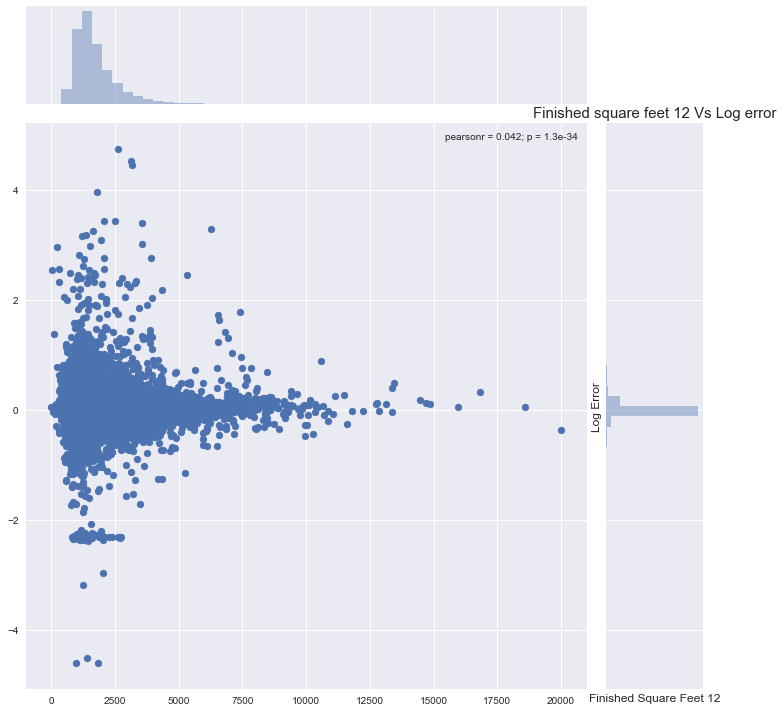

In [46]:
#Square feet varying with log error. Seems the range of logerror narros with increase in finishde square feet. 
#Larger houses are easier to predict?
train_df = pd.merge(train, properties, on='parcelid', how='left')

col = "finishedsquarefeet12"
ulimit = np.percentile(train_df[col].values, 99.5)
llimit = np.percentile(train_df[col].values, 0.5)
train_df[col].ix[train_df[col]>ulimit] = ulimit
train_df[col].ix[train_df[col]<llimit] = llimit

plt.figure(figsize=(12,12))
sns.jointplot(x=train_df.finishedsquarefeet12.values, y=train_df.logerror.values, size=10)
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Finished Square Feet 12', fontsize=12)
plt.title("Finished square feet 12 Vs Log error", fontsize=15)
plt.show()


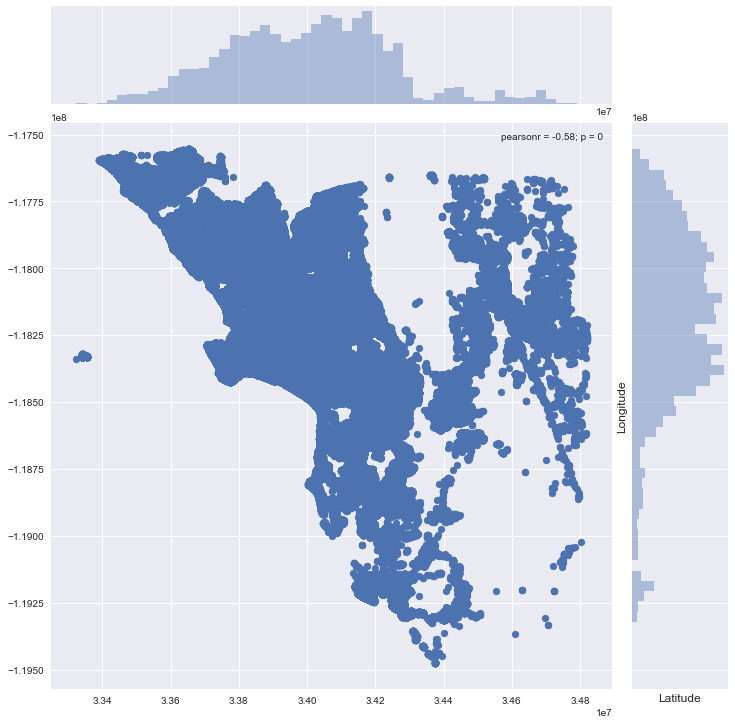

In [48]:
plt.figure(figsize=(12,12))
sns.jointplot(x=properties.latitude.values, y=properties.longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

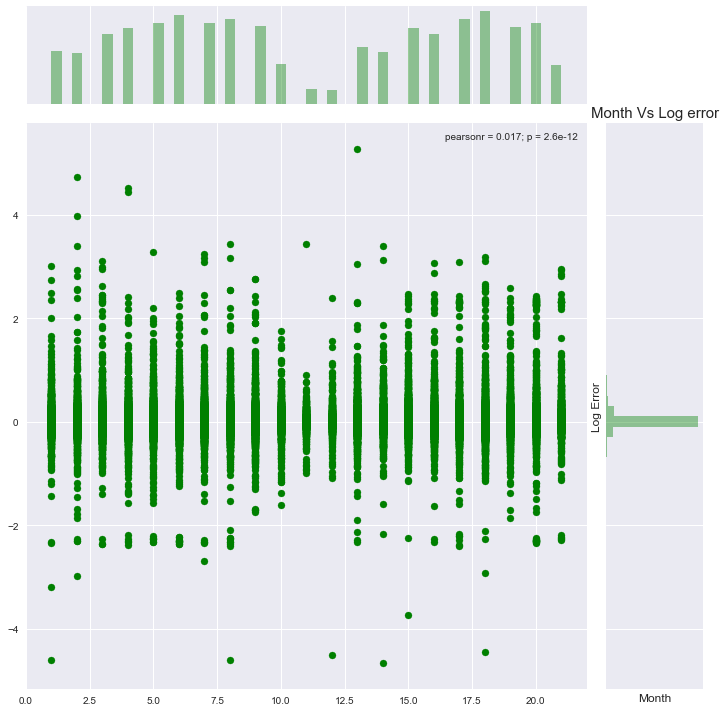

In [34]:
#col = "taxamount"
#ulimit = np.percentile(train_df[col].values, 99.5)
#llimit = np.percentile(train_df[col].values, 0.5)
#train_df[col].loc[train_df[col]>ulimit] = ulimit
#train_df[col].loc[train_df[col]<llimit] = llimit
properties["transaction_year"] = properties["transactiondate"].dt.year
properties["transaction_month"] = (properties["transactiondate"].dt.year - 2016)*12 + properties["transactiondate"].dt.month
properties["transaction_day"] = properties["transactiondate"].dt.day


plt.figure(figsize=(12,12))
sn.jointplot(x=properties['transaction_month'].values, y=properties['logerror'].values, size=10, color='g')
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.title("Month Vs Log error", fontsize=15)
plt.show()

/Users/BurrusRA/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/BurrusRA/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/BurrusRA/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


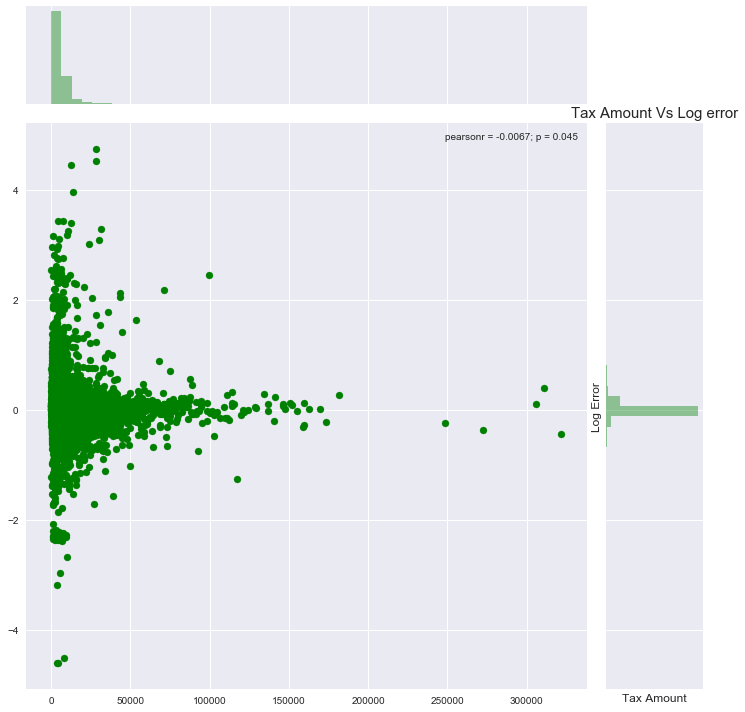

In [49]:
col = "taxamount"
ulimit = np.percentile(train_df[col].values, 99.5)
llimit = np.percentile(train_df[col].values, 0.5)
train_df[col].loc[train_df[col]>ulimit] = ulimit
train_df[col].loc[train_df[col]<llimit] = llimit

plt.figure(figsize=(12,12))
sns.jointplot(x=train_df['taxamount'].values, y=train_df['logerror'].values, size=10, color='g')
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Tax Amount', fontsize=12)
plt.title("Tax Amount Vs Log error", fontsize=15)
plt.show()

/Users/BurrusRA/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


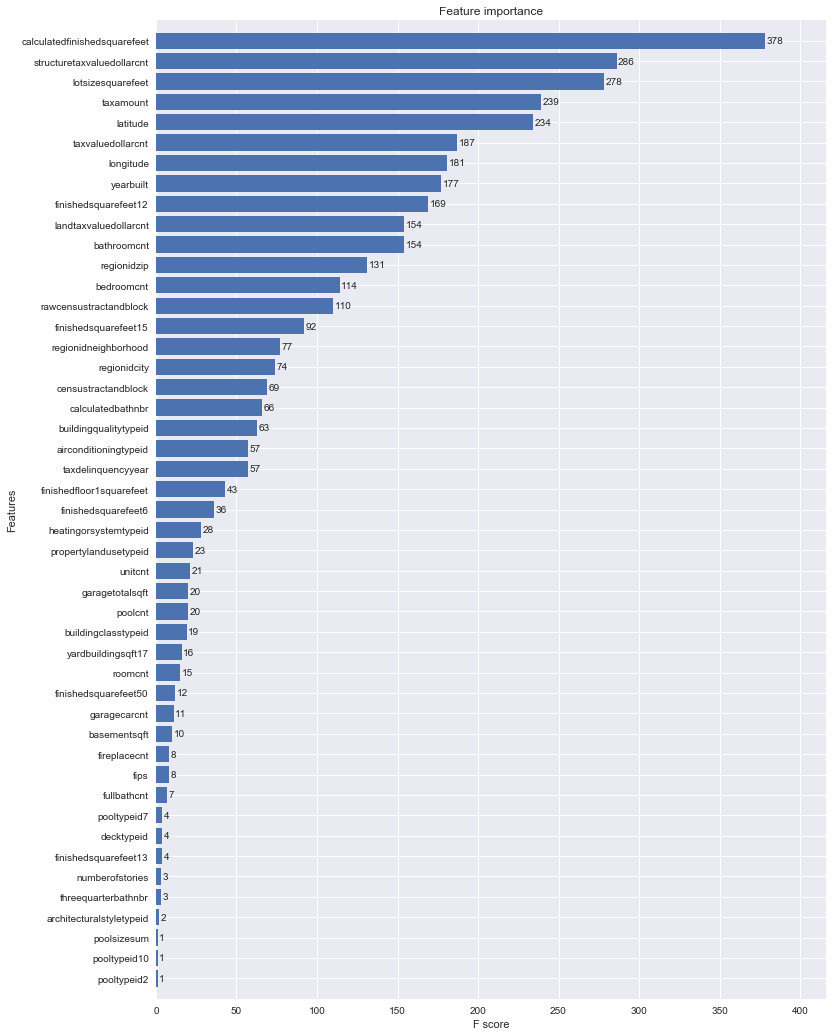

In [5]:
#Important Features
import xgboost as xgb
train_df = pd.merge(train, properties, on='parcelid', how='left')
train_y = train_df['logerror'].values
cat_cols = ["hashottuborspa", "propertycountylandusecode", "propertyzoningdesc", "fireplaceflag", "taxdelinquencyflag"]
train_df = train_df.drop(['parcelid', 'logerror', 'transactiondate']+cat_cols, axis=1)
feat_names = train_df.columns.values
xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1,
    'seed' : 0
}
dtrain = xgb.DMatrix(train_df, train_y, feature_names=train_df.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=50)

# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, height=0.8, ax=ax)
plt.show()

In [8]:
merged = pd.merge(train, properties, on='parcelid', how='left')
mergedFilterd = merged.fillna(-999)
for f in mergedFilterd.columns:
    if mergedFilterd[f].dtype=='object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(mergedFilterd[f].values)) 
        mergedFilterd[f] = lbl.transform(list(mergedFilterd[f].values))
        
train_y = mergedFilterd.logerror.values
train_X = mergedFilterd.drop(["parcelid", "transactiondate", "logerror"], axis=1)

xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)

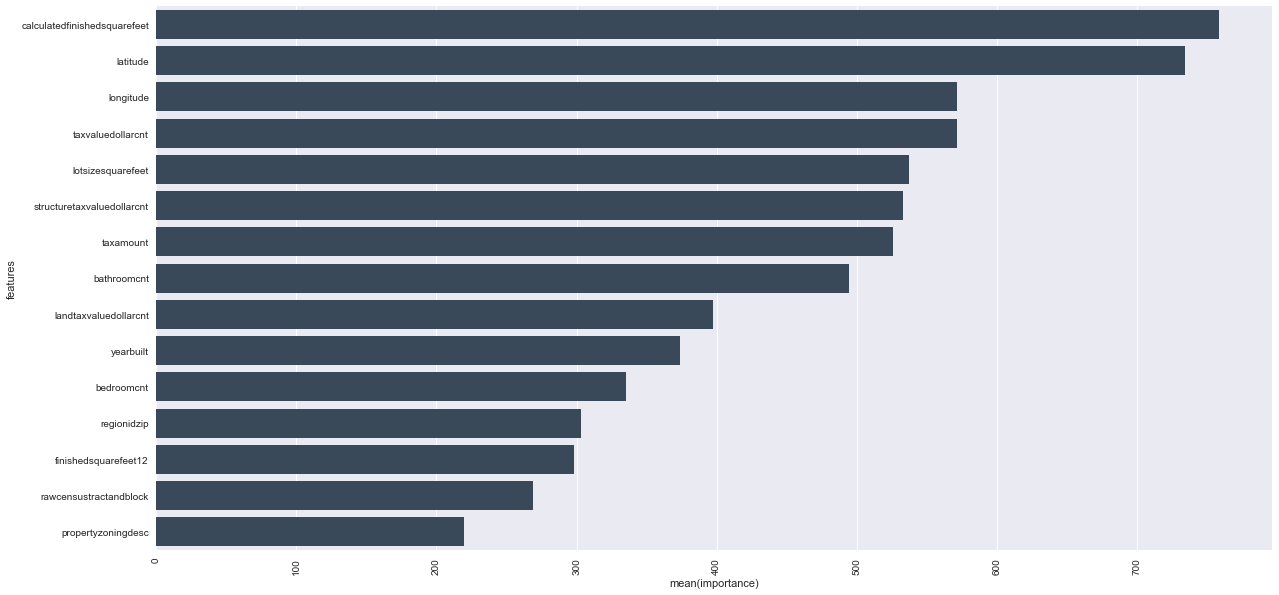

In [9]:
featureImportance = model.get_fscore()
features = pd.DataFrame()
features['features'] = featureImportance.keys()
features['importance'] = featureImportance.values()
features.sort_values(by=['importance'],ascending=False,inplace=True)
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
plt.xticks(rotation=90)
sn.barplot(data=features.head(15),x="importance",y="features",ax=ax,orient="h",color="#34495e")